In [82]:
import tensorflow as tf
import numpy as np
import math

SSD - the single shot detector uses a variation on Mulitbox, Faster RCNN style box priors 

It generates a lot of box priors using feature shapes from conv layers - these conv layers 
provide a kind of scale pyramid - the stride creating a enlarged receptive field.
We concat box priors from the various convs, threshold and apply non-maximal surpression.

Lets visualize some of the prior anchors

In [83]:
feat_shapes=[(38, 38), (19, 19), (10, 10), (5, 5), (3, 3), (1, 1)]

anchor_size_bounds=[0.15, 0.90]

anchor_sizes=[(21., 45.),
              (45., 99.),
              (99., 153.),
              (153., 207.),
              (207., 261.),
              (261., 315.)]

anchor_ratios=[[2, .5],
               [2, .5, 3, 1./3],
               [2, .5, 3, 1./3],
               [2, .5, 3, 1./3],
               [2, .5],
               [2, .5]]

anchor_steps=[8, 16, 32, 64, 100, 300]

anchor_offset=0.5

normalizations=[20, -1, -1, -1, -1, -1]

prior_scaling=[0.1, 0.1, 0.2, 0.2]

In [84]:
def box_anchors(img_shape,
                         feat_shape,
                         sizes,
                         ratios,
                         offset=0.5,
                         dtype=np.float32):
    """
    The box creation is pretty basic - just tile a load of boxes over the image
    """
    
    print(img_shape, feat_shape, sizes, ratios, step)
    # Compute the position grid: simple way.
    y, x = np.mgrid[0:feat_shape[0], 0:feat_shape[1]]
    y = (y.astype(dtype) + offset) / feat_shape[0]
    x = (x.astype(dtype) + offset) / feat_shape[1]
    
    # Expand dims
    y = np.expand_dims(y, axis=-1)
    x = np.expand_dims(x, axis=-1)

    # Compute relative height and width.
    # Tries to follow the original implementation of SSD for the order.
    num_anchors = len(sizes) + len(ratios)
    h = np.zeros((num_anchors, ), dtype=dtype)
    w = np.zeros((num_anchors, ), dtype=dtype)
    
    # Add first anchor boxes with ratio=1.
    h[0] = sizes[0] / img_shape[0]
    w[0] = sizes[0] / img_shape[1]
    
    h[1] = math.sqrt(sizes[0] * sizes[1]) / img_shape[0]
    w[1] = math.sqrt(sizes[0] * sizes[1]) / img_shape[1]
    
    di = 2
        
    for i, r in enumerate(ratios):
        h[i+di] = sizes[0] / img_shape[0] / math.sqrt(r)
        w[i+di] = sizes[0] / img_shape[1] * math.sqrt(r)
    return y, x, h, w

ssd_anchor_one_layer(img_shape,
                         feat_shape,
                         sizes,
                         ratios,
                         step,
                         offset=0.5,
                         dtype=np.float32)

In [85]:
i = 2
img_shape = [300, 300]

a_y, a_x, a_h, a_w = ssd_anchor_one_layer(img_shape, feat_shapes[i],
                             anchor_sizes[i],
                             anchor_ratios[i],
                             anchor_steps[i])

#print(np.transpose(yx))
print(a_y.shape)

#print(np.transpose(yx))
print(a_x.shape) 

([300, 300], (10, 10), (99.0, 153.0), [2, 0.5, 3, 0.3333333333333333], 32)
(10, 10, 1)
(10, 10, 1)


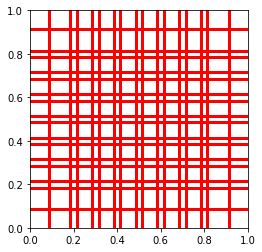

100


In [86]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

fig, ax = plt.subplots(1)

width = 300
height = 300

boxes = 0

for x in range(0, feat_shapes[i][0]):
    for y in range(0, feat_shapes[i][1]):
        
        for w_i in range(0, 1):
            for h_i in range(0, 1):
        
                w = a_w[w_i]
                h = a_h[h_i]

                x_pos = a_x[x,y][0] - (w/2)
                y_pos = a_y[x,y][0] - (h/2)

                rect = patches.Rectangle((x_pos, y_pos),w,h,linewidth=3,edgecolor='r',facecolor='none')

                ax.add_patch(rect)
                
                boxes += 1
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
print(boxes)

these are the priors at a single scaling (i=2) and just the w 0 width
if we replace the range in: for w_i in range(0, 1)
with the full range and vary the i scaling we can see <i>a lot<i> of boxes are 
checked along the way.